**1-a:**

In [1]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

In [2]:
X = np.transpose(np.array([[2, -1],
                           [1, -3],
                           [-1, 3],
                           [-2, 2],
                           [-3, 0],
                           [-1, -1],
                           [-1, -2],#-----------------
                           [4, 1],
                           [4, 4],
                           [1, 4],
                           [-5, 1],
                           [-4.5, 5],
                           [-4, 4],
                           [-4, -2],
                           [-3, -4],
                           [1, -5]]))
y = np.array([1,1,1,1,1,1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1])

X_test = np.transpose(np.array([[1, 1],[1, 2],[4, -4],[5, -2]]))
y_test =  np.array([1,1,-1,-1])

In [9]:
def define_y(x):
    y=[]
    for i in range(np.shape(x)[0]):
        if(x[i][0])<1:
            y.append(-1)
        else:
            y.append(1)
    return y

In [38]:
#train matrix : first element of each row = r  ,  second element in each row = theta
polar_train=np.random.rand(100,2)*[2,np.pi*2]
polar_test=np.random.rand(20,2)*[2,np.pi*2]
y_train=labeling(polar_train)
y_test=labeling(polar_test)
train=np.transpose([polar_train[:,0]*np.cos(polar_train[:,1]),polar_train[:,0]*np.sin(polar_train[:,1])])
test=np.transpose([polar_test[:,0]*np.cos(polar_test[:,1]),polar_test[:,0]*np.sin(polar_test[:,1])])

(-2.0, 2.0)

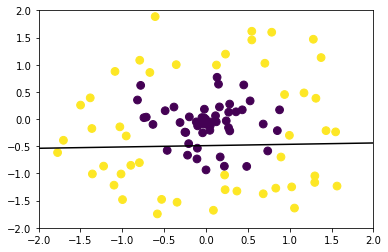

In [46]:
linear_clf=svm.LinearSVC()
linear_clf.fit(train,y_train)

x=np.linspace(-3,3,30)
y=np.linspace(-3,3,30)
xx,yy=np.meshgrid(x,y)
xy=np.vstack([np.ravel(xx),np.ravel(yy)]).T
z=linear_clf.decision_function(xy).reshape(30,30)
plt.contour(xx,yy,z,levels=1,colors='k')
plt.scatter(train[:,0],train[:,1],c=y_train,s=60)
#plt.scatter(linear_clf.support_vectors_[:,0],linear_clf.support_vectors_[:,1],linewidths=1.5,edgecolors='k',facecolor='none',s=75)
plt.xlim(-2,2)
plt.ylim(-2,2)

In [39]:
y_train=define_y(train)
y_test=define_y(test)

In [40]:
model=svm.LinearSVC()
model.fit(train,y_train)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [41]:
print("train accuracy : ",metrics.accuracy_score(y_train, model.predict(train)))
print("test accuracy : ",metrics.accuracy_score(y_test, model.predict(test)))

train accuracy :  0.98
test accuracy :  0.95


(-2.0, 2.0)

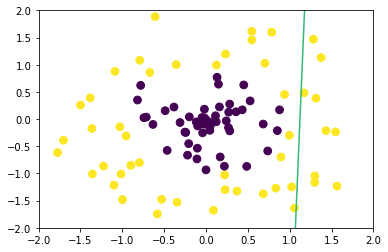

In [47]:
x=np.linspace(-3,3,30)
y=np.linspace(-3,3,30)
xx,yy=np.meshgrid(x,y)
xy=np.vstack([np.ravel(xx),np.ravel(yy)]).T
z=model.decision_function(xy).reshape(30,30)
plt.contour(xx,yy,z,levels=1)
plt.scatter(train[:,0],train[:,1],c=y_train,s=60)
plt.xlim(-2,2)
plt.ylim(-2,2)

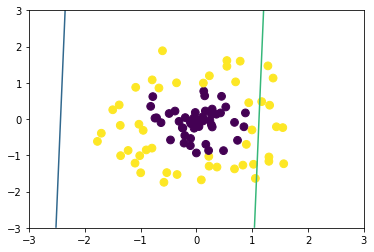

In [48]:
sv_index=np.where(np.abs(model.decision_function(train))<.03)[0]
for i in sv_index:
    plt.scatter(train[i][0],train[i][1],facecolors='none',s=80,linewidths=3)
plt.scatter(train[:,0],train[:,1],c=y_train,s=60)
plt.contour(xx,yy,z,levels=1)

**1-b :**

In [21]:
from sklearn.model_selection import cross_val_score
ac=[]
c = []
for i in range(1,200):
    soft_model=svm.SVC(kernel='linear',C=i/100)
    acc=np.mean(cross_val_score(soft_model,train,y_train))
    ac.append(acc)
    c.append(i/100)

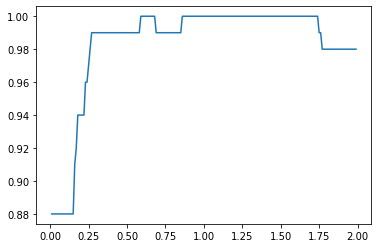

In [22]:
import matplotlib.pyplot as plt
plt.plot(c,ac)

so the best value for c is 1

In [23]:
soft_model=svm.SVC(kernel='linear',C=1)
soft_model.fit(train,y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [24]:
print("train accuracy :",metrics.accuracy_score(y_train,soft_model.predict(train)))
print("test accuracy",metrics.accuracy_score(y_test,soft_model.predict(test)))

train accuracy : 1.0
test accuracy 1.0


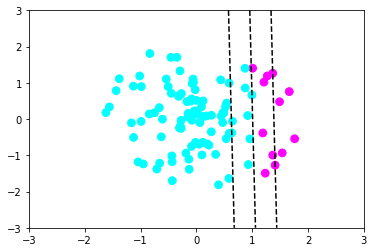

In [27]:
z=soft_model.decision_function(xy).reshape(30,30)
plt.contour(xx,yy,z,levels=[-1,0,1],colors='k',linestyles=['--'])
plt.scatter(train[:,0],train[:,1],c=y_train,s=60,cmap='cool')
plt.scatter(soft_model.support_vectors_[:,0],soft_model.support_vectors_[:,1],linewidths=2,facecolor='none',s=75)


**1-c :**

In [33]:
# accuarcy of cross validation on rbf kernel
np.mean(cross_val_score(svm.SVC(kernel='rbf'),train,y_train))

0.97

In [35]:
# accuarcy of cross validation on  polynomial kernel with degree 2
poly_2_clf=
np.mean(cross_val_score(svm.SVC(kernel='poly',degree=2),train,y_train))


0.9200000000000002

In [30]:
# accuarcy of cross validation on polynomial kernel with degree 3
np.mean(cross_val_score(svm.SVC(kernel='poly',degree=3),train,y_train))

0.97

In [37]:
# most accuracy belongs to polynomial kernel with degree 3 so :
best_model = svm.SVC(kernel='poly',degree=3)
best_model.fit(train,y_train)

print(" train accuracy : ",metrics.accuracy_score(y_train,best_model.predict(train)))
print(" test accuracy : ",metrics.accuracy_score(y_test,best_model.predict(test)))

 train accuracy :  0.98
 test accuracy :  1.0


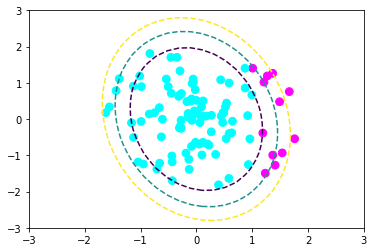

In [32]:
z=poly_2_clf.decision_function(xy).reshape(30,30)
plt.contour(xx,yy,z,levels=[-1,0,1],linestyles=['--'])
plt.scatter(train[:,0],train[:,1],c=y_train,s=60,cmap='cool')
plt.scatter(poly_2_clf.support_vectors_[:,0],poly_2_clf.support_vectors_[:,1],linewidths=2,facecolor='none',s=75)


*  **2-a :**

In [ ]:
iris=pd.read_csv('/content/iris .csv')

In [ ]:
x=iris.iloc[:,:-1]
y=iris.iloc[:,4]
x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=0.30)

In [ ]:
model=SVC()
model.fit(x_train, y_train)
# testing
pred=model.predict(x_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test, pred))

[[16  0  0]
 [ 0 10  0]
 [ 0  6 13]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.62      1.00      0.77        10
 Iris-virginica       1.00      0.68      0.81        19

       accuracy                           0.87        45
      macro avg       0.88      0.89      0.86        45
   weighted avg       0.92      0.87      0.87        45



In [ ]:
y_train.shape

(104,)

In [ ]:
# validation
x_train,x_valid, y_train, y_valid=train_test_split(x_train,y_train,test_size=0.25)

In [ ]:
model=SVC()
model.fit(x_train, y_train)
pred=model.predict(x_valid)
print(confusion_matrix(y_valid,pred))
print(classification_report(y_valid, pred))

[[ 5  0  0]
 [ 0 13  0]
 [ 0  3  5]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         5
Iris-versicolor       0.81      1.00      0.90        13
 Iris-virginica       1.00      0.62      0.77         8

       accuracy                           0.88        26
      macro avg       0.94      0.88      0.89        26
   weighted avg       0.91      0.88      0.88        26



so accuracy on testset is " 87 % " and accuracy on validationset is " 88 % " 

*  **2-b :**

In [ ]:
ac = []
c = []
x0_train,x0_test, y0_train, y0_test=train_test_split(x,y,test_size=0.30)
x0_train , x0_valid , y0_train , y0_valid = train_test_split(x0_train,y0_train,test_size=0.25)
for i in range(1 , 200):
  svclassifier = SVC(kernel='linear', C = i/100)
  svclassifier.fit(x0_train, y0_train)
  y0_pred = svclassifier.predict(x0_valid)
  c.append(i/100)
  ac.append(accuracy_score(y0_valid, y0_pred))

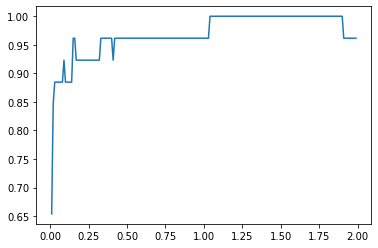

In [ ]:
import matplotlib.pyplot as plt
plt.plot(c,ac)

**according to the plot the best c-value for soft svm is from 0.5 to 1.12 which gives us the accuracy of 96% 
so we use c=1 for this part**

In [ ]:
x0_train,x0_test, y0_train, y0_test=train_test_split(x,y,test_size=0.30)
x0_train , x0_valid , y0_train , y0_valid = train_test_split(x0_train,y0_train,test_size=0.25)
svclassifier = SVC(kernel='linear', C = 1)
svclassifier.fit(x0_train, y0_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# validation accuracy
y0_pred = svclassifier.predict(x0_valid)
print(classification_report(y0_valid, y0_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00         9

       accuracy                           1.00        26
      macro avg       1.00      1.00      1.00        26
   weighted avg       1.00      1.00      1.00        26



In [ ]:
# test accuracy
y00_pred = svclassifier.predict(x0_test)
print(classification_report(y0_test, y00_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      0.86      0.92        14
 Iris-virginica       0.86      1.00      0.92        12

       accuracy                           0.96        45
      macro avg       0.95      0.95      0.95        45
   weighted avg       0.96      0.96      0.96        45



*  **2-c :**

In [ ]:
svclassifier = SVC(kernel='poly', degree=8)
x1_train,x1_test, y1_train, y1_test=train_test_split(x,y,test_size=0.30)
x1_train , x1_valid , y1_train , y1_valid = train_test_split(x1_train,y1_train,test_size=0.25)
svclassifier.fit(x1_train, y1_train)
y1_pred = svclassifier.predict(x1_valid)

In [ ]:
print(confusion_matrix(y1_valid, y1_pred))
print(classification_report(y1_valid, y1_pred))

[[9 0 0]
 [0 9 1]
 [0 0 7]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.88      1.00      0.93         7

       accuracy                           0.96        26
      macro avg       0.96      0.97      0.96        26
   weighted avg       0.97      0.96      0.96        26



so validation accuracy by using polynomial kernel is 96%

In [ ]:
svclassifier = SVC(kernel='rbf')
x2_train,x2_test, y2_train, y2_test=train_test_split(x,y,test_size=0.30)
x2_train , x2_valid , y2_train , y2_valid = train_test_split(x2_train,y2_train,test_size=0.25)
svclassifier.fit(x2_train, y2_train)
y2_pred = svclassifier.predict(x2_valid)

In [ ]:
print(confusion_matrix(y2_valid, y2_pred))
print(classification_report(y2_valid, y2_pred))

[[10  0  0]
 [ 0  7  0]
 [ 0  0  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         7
 Iris-virginica       1.00      1.00      1.00         9

       accuracy                           1.00        26
      macro avg       1.00      1.00      1.00        26
   weighted avg       1.00      1.00      1.00        26



 validation accuracy by using rbf kernel is 100%

  **so the rbf kernel is better then the otherone**

In [ ]:
# we've seen the accuracy on trainigset (validation) so now is testset's turn :
y22_pred = svclassifier.predict(x2_test)
print(confusion_matrix(y2_test, y22_pred))
print(classification_report(y2_test, y22_pred))

[[10  0  0]
 [ 0 15  0]
 [ 0  1 19]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.94      1.00      0.97        15
 Iris-virginica       1.00      0.95      0.97        20

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



so for rbf kernel we have 45 soppurt vectors and 98 % accuracy on testset

**2-d :**

In [ ]:
ac3 = []
c3 = []
x3_train,x3_test, y3_train, y3_test=train_test_split(x,y,test_size=0.30)
x3_train , x3_valid , y3_train , y3_valid = train_test_split(x3_train,y3_train,test_size=0.25)
for i in range(1 , 100):
  svclassifier = SVC(kernel='rbf', C = i/100)
  svclassifier.fit(x3_train, y3_train)
  y3_pred = svclassifier.predict(x3_valid)
  c3.append(i/100)
  ac3.append(accuracy_score(y3_valid, y3_pred))

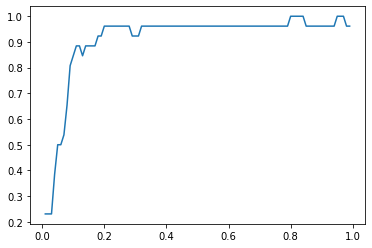

In [ ]:
import matplotlib.pyplot as plt
plt.plot(c3,ac3)

according to plot we use c = 0.5

In [ ]:
x3_train,x3_test, y3_train, y3_test=train_test_split(x,y,test_size=0.30)
x3_train , x3_valid , y3_train , y3_valid = train_test_split(x3_train,y3_train,test_size=0.25)
svclassifier = SVC(kernel='linear', C = 0.5)
svclassifier.fit(x3_train, y3_train)

SVC(C=0.5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# validation accuracy
y3_pred = svclassifier.predict(x3_valid)
print(classification_report(y3_valid, y3_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      0.88      0.93         8
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.96        26
      macro avg       0.95      0.96      0.95        26
   weighted avg       0.97      0.96      0.96        26



In [ ]:
# test accuracy
y33_pred = svclassifier.predict(x3_test)
print(classification_report(y3_test, y33_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.85      1.00      0.92        11
 Iris-virginica       1.00      0.90      0.95        21

       accuracy                           0.96        45
      macro avg       0.95      0.97      0.96        45
   weighted avg       0.96      0.96      0.96        45

